Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Reading csv files

In [2]:
df_train  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/startupdata/training_set_label.csv" )
df_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/startupdata/testing_set_label.csv')
df_test.drop(columns = ["Unnamed: 6", "name", "Unnamed: 0"], inplace=True)
df_train

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,01-01-09,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,01-01-98,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,01-01-99,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,01-01-09,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


Dropping irrelevant columns

In [3]:
df_train.drop(columns = ["Unnamed: 6", "name", "Unnamed: 0"], inplace=True)

# Cleaning dataset

In [4]:
df_train.isnull().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecomm

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   zip_code                  923 non-null    object 
 4   id                        923 non-null    object 
 5   city                      923 non-null    object 
 6   founded_at                923 non-null    object 
 7   closed_at                 335 non-null    object 
 8   first_funding_at          923 non-null    object 
 9   last_funding_at           923 non-null    object 
 10  age_first_funding_year    923 non-null    float64
 11  age_last_funding_year     923 non-null    float64
 12  age_first_milestone_year  771 non-null    float64
 13  age_last_milestone_year   771 non-null    float64
 14  relationsh

In [6]:
# for column in ["state_code"]:
#     print(column)
#     for i in range(len(df_train[column].value_counts())):
#         filt = df_train[column]==df_train[column].value_counts().index[i]
#         print(f"======{df_train[column].value_counts().index[i]}-closed_at=====\n")
#         print(df_train[filt]["closed_at"].value_counts()/len(df_train[filt])*100, "\n")
#     print("=======================================")

In [7]:
df_train.loc[:,"closed_at"]

0            NaN
1            NaN
2            NaN
3            NaN
4       10-01-12
         ...    
918          NaN
919    6/25/2008
920    6/17/2012
921          NaN
922          NaN
Name: closed_at, Length: 923, dtype: object

In [8]:
df_train["closed_at"] = pd.to_datetime(df_train["closed_at"])
df_train["founded_at"] = pd.to_datetime(df_train["founded_at"])
df_train["first_funding_at"] = pd.to_datetime(df_train["first_funding_at"])
df_train["last_funding_at"] = pd.to_datetime(df_train["last_funding_at"])

In [9]:
df_test["closed_at"] = pd.to_datetime(df_test["closed_at"])
df_test["founded_at"] = pd.to_datetime(df_test["founded_at"])
df_test["first_funding_at"] = pd.to_datetime(df_test["first_funding_at"])
df_test["last_funding_at"] = pd.to_datetime(df_test["last_funding_at"])

In [10]:
df_train["closed_at"] = df_train["closed_at"].max() - df_train["closed_at"]
df_train["founded_at"] = df_train["founded_at"].max() - df_train["founded_at"]
df_train["first_funding_at"] = df_train["first_funding_at"].max() - df_train["first_funding_at"]
df_train["last_funding_at"] = df_train["last_funding_at"].max() - df_train["last_funding_at"]

In [11]:
df_test["closed_at"] = df_test["closed_at"].max() - df_test["closed_at"]
df_test["founded_at"] = df_test["founded_at"].max() - df_test["founded_at"]
df_test["first_funding_at"] = df_test["first_funding_at"].max() - df_test["first_funding_at"]
df_test["last_funding_at"] = df_test["last_funding_at"].max() - df_test["last_funding_at"]

In [12]:
df_train['closed_at'] = df_train['closed_at'].astype('timedelta64[D]')
df_train['founded_at'] = df_train['founded_at'].astype('timedelta64[D]')
df_train['first_funding_at'] = df_train['first_funding_at'].astype('timedelta64[D]')
df_train['last_funding_at'] = df_train['last_funding_at'].astype('timedelta64[D]')

In [13]:
df_test['closed_at'] = df_test['closed_at'].astype('timedelta64[D]')
df_test['founded_at'] = df_test['founded_at'].astype('timedelta64[D]')
df_test['first_funding_at'] = df_test['first_funding_at'].astype('timedelta64[D]')
df_test['last_funding_at'] = df_test['last_funding_at'].astype('timedelta64[D]')

Adding two new features :
- id_closed
- got_milestone

In [14]:
df_train["is_closed"] = 1
df_train["got_milestone"] = 1

In [15]:
df_test["is_closed"] = 1
df_test["got_milestone"] = 1

In [16]:
df_train.loc[df_train["closed_at"].isnull(), "is_closed"] = 0
df_train.loc[df_train["age_first_milestone_year"].isnull(), "got_milestone"] = 0

In [17]:
df_test.loc[df_test["closed_at"].isnull(), "is_closed"] = 0
df_test.loc[df_test["age_first_milestone_year"].isnull(), "got_milestone"] = 0

In [18]:
df_train.loc[df_train["age_first_milestone_year"].notnull(), "got_milestone"]

0      1
1      1
2      1
3      1
4      1
      ..
918    1
919    1
920    1
921    1
922    1
Name: got_milestone, Length: 771, dtype: int64

In [19]:
df_train["milestones"].value_counts()

1    250
2    246
3    182
0    152
4     62
5     24
6      6
8      1
Name: milestones, dtype: int64

In [20]:
df_train["closed_at"].fillna(-1, inplace=True)
df_train["age_first_milestone_year"].fillna(30, inplace=True)
df_train["age_last_milestone_year"].fillna(30, inplace=True)

In [21]:
df_test["closed_at"].fillna(-1, inplace=True)
df_test["age_first_milestone_year"].fillna(30, inplace=True)
df_test["age_last_milestone_year"].fillna(30, inplace=True)

In [22]:
df_train.loc[df_train["state_code.1"].isnull(), "state_code.1"] = "CA"

In [23]:
df_train.isnull().sum().sum()

0

# Labeling

In [24]:
df_train.columns

Index(['state_code', 'latitude', 'longitude', 'zip_code', 'id', 'city',
       'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'is_closed', 'got_milestone'],
      dtype='object')

Dropping unnecessary columns

In [25]:
df_train.drop(columns=["id", "object_id", "state_code.1", "city", "zip_code"], inplace=True)

In [26]:
df_test.drop(columns=["id", "object_id", "state_code.1", "city", "zip_code"], inplace=True)

In [27]:
cat_columns = ["state_code", "is_CA", "is_NY", "is_MA", "is_TX", "is_otherstate", "category_code",
               "is_software", "is_web", "is_mobile", "is_enterprise", "is_advertising", "is_gamesvideo",
               "is_ecommerce", "is_biotech", "is_consulting", "is_othercategory", "has_VC", "has_angel", "has_roundA",
               "has_roundB", "has_roundC", "has_roundD", "is_top500", "is_closed", "got_milestone"
              ]
cont_columns = []
for column in df_train.drop(columns = ["status"]).columns:
    if column not in cat_columns:
        cont_columns.append(column)

In [28]:
cont_columns

['latitude',
 'longitude',
 'founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'avg_participants']

In [29]:
df_train.head()

,state_code,latitude,longitude,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,is_closed,got_milestone
0,CA,42.358880,-71.056820,2297.0,-1.0,1694.0,1419.0,2.2493,3.0027,4.6685,...,1,0,0,0,0,1.0000,0,acquired,0,1
1,CA,37.238916,-121.973718,4854.0,-1.0,3201.0,1423.0,5.1260,9.9973,7.0055,...,0,0,1,1,1,4.7500,1,acquired,0,1
2,CA,32.901049,-117.192656,1490.0,-1.0,1331.0,1331.0,1.0329,1.0329,1.4575,...,0,1,0,0,0,4.0000,1,acquired,0,1
3,CA,37.320309,-122.050040,4123.0,-1.0,3198.0,2401.0,3.1315,5.3151,6.0027,...,0,0,1,1,1,3.3333,1,acquired,0,1
4,CA,37.779281,-122.419236,989.0,394.0,1207.0,598.0,0.0000,1.6685,0.0384,...,1,0,0,0,0,1.0000,1,closed,1,1


In [30]:
df_train[cont_columns].corr()

,latitude,longitude,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,avg_participants
latitude,1.000000,0.368475,-0.032977,-0.059934,-0.000645,0.002097,-0.046868,-0.041692,-0.059929,-0.057103,-0.039198,-0.000659,-0.072941,0.017708,-0.018176
longitude,0.368475,1.000000,-0.047596,-0.036695,-0.058708,-0.078556,-0.014158,-0.000148,0.016195,0.004347,-0.073197,0.022447,0.017970,-0.016420,-0.045191
founded_at,-0.032977,-0.047596,1.000000,0.138722,0.723726,0.571340,0.769350,0.797092,0.349535,0.365756,-0.028099,0.089485,0.054034,-0.211717,0.090776
closed_at,-0.059934,-0.036695,0.138722,1.000000,0.063649,0.235889,0.140744,-0.004671,0.219267,0.198864,-0.245533,-0.209912,-0.026497,-0.237989,-0.107982
first_funding_at,-0.000645,-0.058708,0.723726,0.063649,1.000000,0.632455,0.115953,0.415771,0.197812,0.238567,0.159198,0.307087,0.033945,-0.009543,0.017600
last_funding_at,0.002097,-0.078556,0.571340,0.235889,0.632455,1.000000,0.236864,-0.040183,0.249321,0.267165,-0.145820,-0.376548,-0.068753,-0.183282,-0.016820
age_first_funding_year,-0.046868,-0.014158,0.769350,0.140744,0.115953,0.236864,1.000000,0.762382,0.319974,0.305594,-0.187817,-0.155478,0.046350,-0.295894,0.114363
age_last_funding_year,-0.041692,-0.000148,0.797092,-0.004671,0.415771,-0.040183,0.762382,1.000000,0.242105,0.248724,0.073080,0.385999,0.116371,-0.122905,0.122893
age_first_milestone_year,-0.059929,0.016195,0.349535,0.219267,0.197812,0.249321,0.319974,0.242105,1.000000,0.981811,-0.190407,-0.053285,0.004486,-0.608177,0.001656
age_last_milestone_year,-0.057103,0.004347,0.365756,0.198864,0.238567,0.267165,0.305594,0.248724,0.981811,1.000000,-0.150604,-0.027538,0.015789,-0.512057,0.011337


In [31]:
for column in cont_columns:
    print(column)
    grp = df_train.groupby(["status"])
    print(grp[column].median())
    print("=======================================")

latitude
status
acquired    37.779281
closed      37.779281
Name: latitude, dtype: float64
longitude
status
acquired   -121.940842
closed     -117.164363
Name: longitude, dtype: float64
founded_at
status
acquired    2662.0
closed      2511.0
Name: founded_at, dtype: float64
closed_at
status
acquired     -1.0
closed      605.5
Name: closed_at, dtype: float64
first_funding_at
status
acquired    2351.0
closed      2110.5
Name: first_funding_at, dtype: float64
last_funding_at
status
acquired    1413.0
closed      1491.5
Name: last_funding_at, dtype: float64
age_first_funding_year
status
acquired    1.4466
closed      1.4384
Name: age_first_funding_year, dtype: float64
age_last_funding_year
status
acquired    3.7562
closed      2.7192
Name: age_last_funding_year, dtype: float64
age_first_milestone_year
status
acquired    3.0877
closed      3.4548
Name: age_first_milestone_year, dtype: float64
age_last_milestone_year
status
acquired    5.2438
closed      5.0027
Name: age_last_milestone_year,

# age_last_funding_year, closed_at, relationships, funding_total_usd, milestones affect the target value the most

# Hence we shall be encoding and ranking all categorical columns based on the "closed_at" variable 

In [32]:
df_copy = df_train.copy()

In [33]:
def encoder(cat, cont):
    print(f"{cat} relation with {cont}")
    grp = df_train.groupby([cat])
    lst = grp[cont].median().sort_values().index
    feature_map = {lst[i]: i for i in range(len(lst))}
    df_train[cat] = df_train[cat].map(feature_map)
    df_test[cat] = df_test[cat].map(feature_map)
    print("Order:", lst) 

In [34]:
# def test_test(column):
#     print(f"======={column}======")
#     for i in df_test[column].value_counts().index:
#         if i not in df_test[column].value_counts().index:
#             print(i)

In [35]:
for column in cat_columns:
    encoder(column, "closed_at")

state_code relation with closed_at
Order: Index(['VA', 'TX', 'CA', 'CO', 'WA', 'OR', 'TN', 'GA', 'MN', 'NY', 'MD', 'RI',
       'MA', 'IL', 'DC', 'ME', 'NJ', 'PA', 'ID', 'IN', 'MI', 'OH', 'AZ', 'KY',
       'FL', 'NC', 'NH', 'WI', 'AR', 'UT', 'NV', 'NM', 'MO', 'CT', 'WV'],
      dtype='object', name='state_code')
is_CA relation with closed_at
Order: Int64Index([0, 1], dtype='int64', name='is_CA')
is_NY relation with closed_at
Order: Int64Index([0, 1], dtype='int64', name='is_NY')
is_MA relation with closed_at
Order: Int64Index([0, 1], dtype='int64', name='is_MA')
is_TX relation with closed_at
Order: Int64Index([0, 1], dtype='int64', name='is_TX')
is_otherstate relation with closed_at
Order: Int64Index([0, 1], dtype='int64', name='is_otherstate')
category_code relation with closed_at
Order: Index(['advertising', 'transportation', 'sports', 'software', 'semiconductor',
       'security', 'search', 'photo_video', 'news', 'network_hosting', 'music',
       'mobile', 'travel', 'medical', 'm

In [36]:
df_train[cat_columns].head()

,state_code,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500,is_closed,got_milestone
0,2,1,0,0,0,0,10,0,0,0,...,1,0,1,0,0,0,0,1,0,0
1,2,1,0,0,0,0,21,0,0,0,...,0,1,0,0,1,1,1,0,0,0
2,2,1,0,0,0,0,15,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2,1,0,0,0,0,3,1,0,0,...,0,0,0,0,1,1,1,0,0,0
4,2,1,0,0,0,0,18,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [37]:
df_test[cat_columns].head()

,state_code,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,is_top500,is_closed,got_milestone
0,33.0,0,0,0,0,1,11,0,0,1,...,0,0,1,1,1,0,0,0,1,1
1,2.0,1,0,0,0,0,13,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,16.0,0,0,0,0,1,3,1,0,0,...,0,0,0,0,1,1,0,1,1,0
3,2.0,1,0,0,0,0,6,0,0,0,...,1,0,0,1,0,0,0,1,1,0
4,2.0,1,0,0,0,0,22,0,0,0,...,0,0,0,0,0,1,1,0,1,1


In [38]:
df_train[cont_columns] = df_train[cont_columns].astype(int)
df_test[cont_columns] = df_test[cont_columns].astype(int)

In [39]:
df_train[cont_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   latitude                  923 non-null    int32
 1   longitude                 923 non-null    int32
 2   founded_at                923 non-null    int32
 3   closed_at                 923 non-null    int32
 4   first_funding_at          923 non-null    int32
 5   last_funding_at           923 non-null    int32
 6   age_first_funding_year    923 non-null    int32
 7   age_last_funding_year     923 non-null    int32
 8   age_first_milestone_year  923 non-null    int32
 9   age_last_milestone_year   923 non-null    int32
 10  relationships             923 non-null    int32
 11  funding_rounds            923 non-null    int32
 12  funding_total_usd         923 non-null    int32
 13  milestones                923 non-null    int32
 14  avg_participants          923 non-null    

In [40]:
df_train.drop(df_train[df_train.longitude > -20].index, inplace = True)

In [41]:
df_train.longitude = -df_train.longitude
df_train.age_first_funding_year = df_train.age_first_funding_year +10
df_train.age_last_funding_year = df_train.age_last_funding_year +10
df_train.age_first_milestone_year = df_train.age_first_milestone_year +15
df_train.age_last_milestone_year = df_train.age_last_milestone_year +15

In [42]:
df_test.longitude = -df_test.longitude
df_test.age_first_funding_year = df_test.age_first_funding_year +10
df_test.age_last_funding_year = df_test.age_last_funding_year +10
df_test.age_first_milestone_year = df_test.age_first_milestone_year +15
df_test.age_last_milestone_year = df_test.age_last_milestone_year +15

# Balancing the continuous data

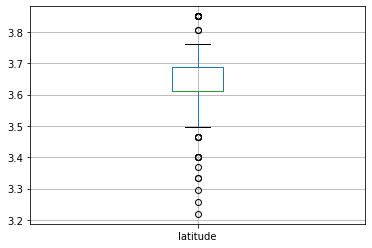

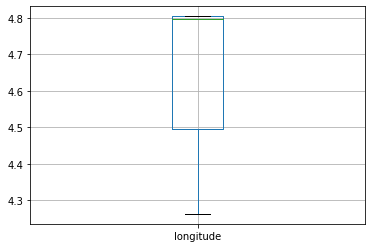

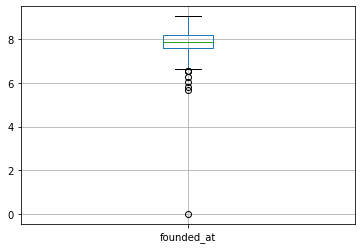

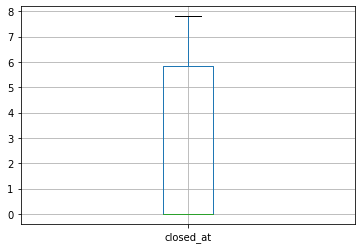

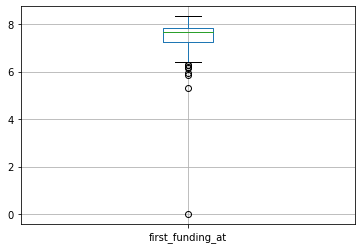

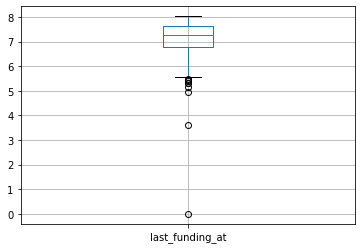

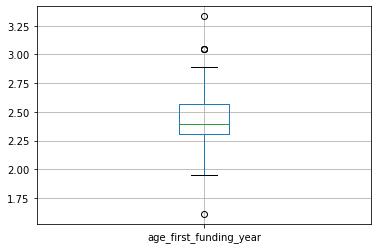

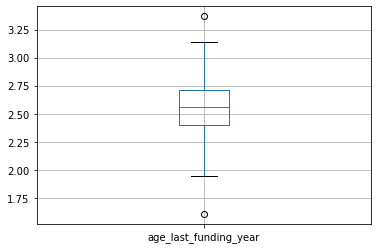

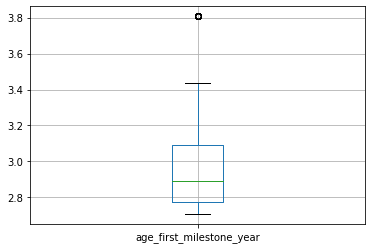

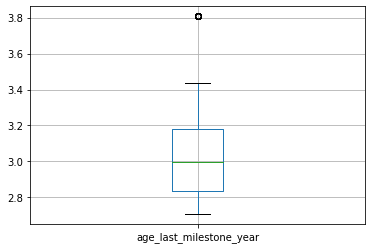

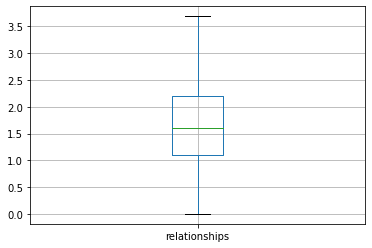

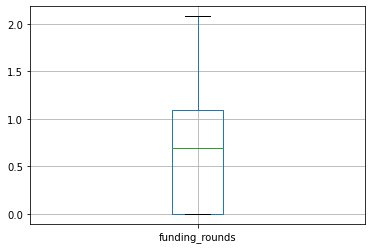

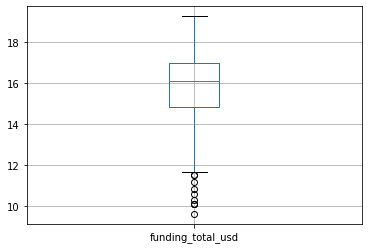

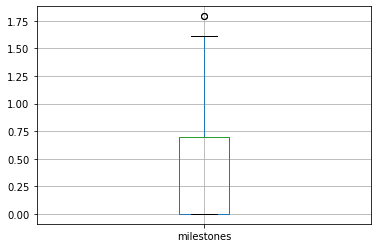

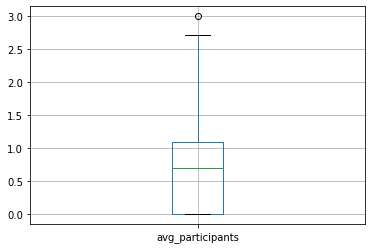

In [43]:
for column in cont_columns:
    df_train[column] = df_train[column].map(lambda i: np.log(i) if i > 0 else 0)
    df_test[column] = df_test[column].map(lambda i: np.log(i) if i > 0 else 0)
    df_test.boxplot([column])
    plt.show()

In [44]:
df_train[df_train.funding_rounds<0].funding_rounds.value_counts()

Series([], Name: funding_rounds, dtype: int64)

In [45]:
features = df_train.drop(columns=["status"]).columns
label_mapping = {'acquired': 1, 'closed': 0}
df_train["status"] = df_train["status"].map(label_mapping)

In [46]:
X = df_train[features]
y = df_train[["status"]]

In [47]:
X1 = sm.add_constant(X)
Logistic = sm.Logit(y, X1)

In [48]:
features = df_train.drop(columns=["status"]).columns
X = df_train[features]
y = df_train["status"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [50]:
features0 = features
X_train0 = X_train[features0]
X_test0 = X_test[features0]
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train0, y_train).score(X_test0, y_test)*100

98.91304347826086

In [51]:
def bagging(model):
    bgr = BaggingClassifier(base_estimator=model, n_estimators=100)
    print(bgr.fit(X_train, y_train).score(X_test, y_test)*100)
def ada_boost(model):
    ada = AdaBoostClassifier(base_estimator=model,n_estimators=100)
    print(ada.fit(X_train, y_train).score(X_test, y_test)*100)

In [52]:
bagging(log_reg)

98.91304347826086


In [53]:
features1 = features
X_train1 = X_train[features]
X_test1 = X_test[features]
rf = RandomForestClassifier(n_estimators=1000, oob_score=True, max_depth=8)
print(rf.fit(X_train1, y_train).score(X_test1, y_test)*100)
print("Accuracy:", rf.oob_score_*100)

98.91304347826086
Accuracy: 98.91156462585035


In [54]:
gb = GradientBoostingClassifier(n_estimators=1000, max_leaf_nodes=11, max_depth=10)
print(gb.fit(X_train1, y_train).score(X_test1, y_test)*100)

98.91304347826086


In [55]:
for feature, imp in zip(features, rf.feature_importances_):
    if imp >=0.05:
        print(f"{feature}: {imp}")

closed_at: 0.3778478207841198
relationships: 0.05733545621677155
is_closed: 0.3654046816599116


In [56]:
ada_boost(rf)

98.91304347826086


In [57]:
lgbm = LGBMClassifier(max_depth=8, learning_rate=0.3, n_estimators=1000, feature_fraction=0.99, min_data_in_leaf=5,
                      objective='binary', num_leaves=8)
print(lgbm.fit(X_train, y_train).score(X_test, y_test)*100)

98.91304347826086


In [58]:
xgb = XGBClassifier(max_depth = 5, num_parallel_tree=7, n_estimators=1000, 
                   objective ='reg:logistic', colsample_bytree = 0.99, 
                   learning_rate = 0.3, alpha = 0.2)
print(xgb.fit(X_train, y_train).score(X_test, y_test)*100)

98.91304347826086


# Testing

In [59]:
df_test.state_code.fillna(df_test.state_code.median(), inplace=True)

In [60]:
X.shape, y.shape

((919, 41), (919,))

In [61]:
# features1 = features
# X_train1 = X_train[features]
# X_test1 = X_test[features]
rf = RandomForestClassifier(n_estimators=1000, oob_score=True, max_depth=8)
print("Accuracy:", rf.fit(X, y).oob_score_*100)

Accuracy: 98.91186071817192


In [62]:
y_pred = pd.Series(rf.predict(df_test))
inv_dict = {v: k for k, v in label_mapping.items()} 
y_pred = y_pred.map(inv_dict)

In [63]:
y_pred

0        closed
1        closed
2        closed
3        closed
4        closed
         ...   
226    acquired
227      closed
228    acquired
229    acquired
230    acquired
Length: 231, dtype: object

In [64]:
ans = pd.DataFrame([y_pred])
ans = ans.melt()[["value"]]
ans.to_csv("Submission.csv", index=False)

Came first in this hackathon:
- https://www.linkedin.com/feed/update/urn:li:activity:6709049790216335360/?commentUrn=urn%3Ali%3Acomment%3A(activity%3A6709043159470624768%2C6709049765012762624)